In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [20]:
data_train_path = 'C:\\Users\\KIIT\\Desktop\\ml class project\\Fruits_Vegetables\\Fruits_Vegetables\\train'
data_test_path = 'C:\\Users\\KIIT\\Desktop\\ml class project\\Fruits_Vegetables\\Fruits_Vegetables\\test'
data_val_path = 'C:\\Users\\KIIT\\Desktop\\ml class project\\Fruits_Vegetables\\Fruits_Vegetables\\validation'

In [21]:
img_width = 180
img_height =180 

In [22]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [23]:
data_cat = data_train.class_names

In [24]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [25]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [26]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


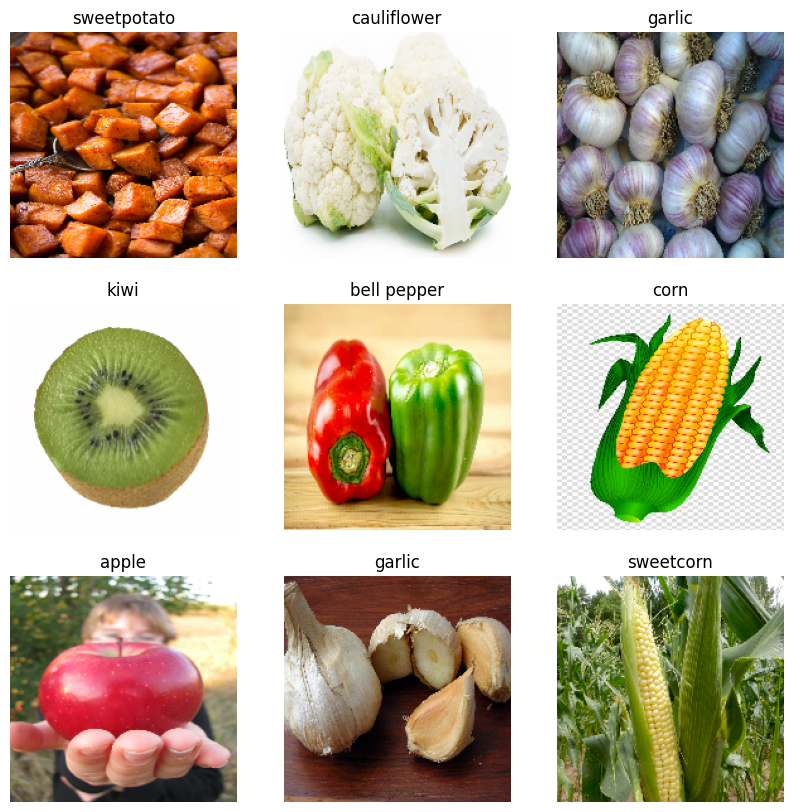

In [27]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
epochs_size = 15
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 607ms/step - accuracy: 0.0339 - loss: 4.0721 - val_accuracy: 0.1140 - val_loss: 3.2043
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 608ms/step - accuracy: 0.1468 - loss: 3.0387 - val_accuracy: 0.4330 - val_loss: 2.1039
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 612ms/step - accuracy: 0.3120 - loss: 2.4147 - val_accuracy: 0.6097 - val_loss: 1.3290
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 61s 601ms/step - accuracy: 0.4419 - loss: 1.9233 - val_accuracy: 0.7920 - val_loss: 0.7934
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 592ms/step - accuracy: 0.6093 - loss: 1.3306 - val_accuracy: 0.8718 - val_loss: 0.5644
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 591ms/step - accuracy: 0.7937 - loss: 0.7276 - val_accuracy: 0.8803 - val_loss: 0.4796
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 594ms/step - accuracy: 0.8662 - loss: 0.4906 - val_accuracy: 0.9174 - val_loss: 0.3288
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 620ms/step - accuracy: 0.9315 - loss: 0.2752 - val_accu

Text(0.5, 1.0, 'Loss')

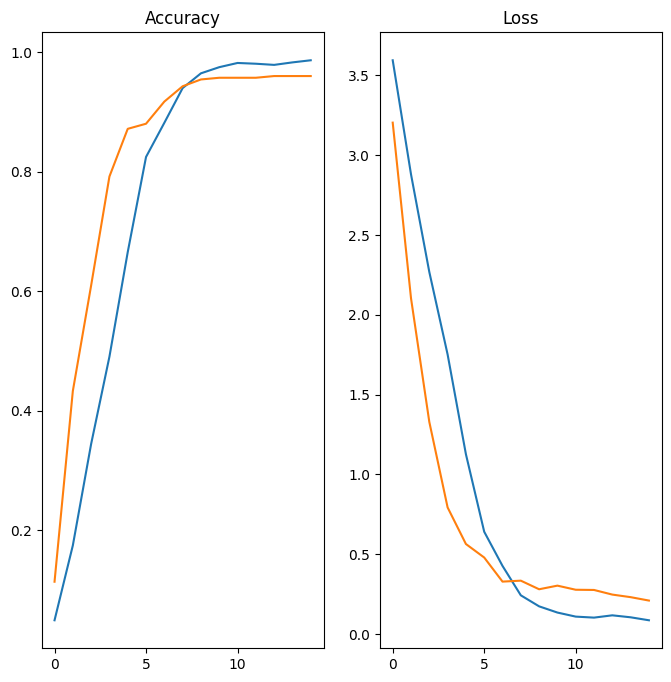

In [33]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [34]:
image = 'C:\\Users\\KIIT\\Desktop\\ml class project\\cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [35]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [36]:
score = tf.nn.softmax(predict)

In [37]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lettuce with accuracy of 70.12


In [38]:
model.save('Image_classify.keras')